In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist


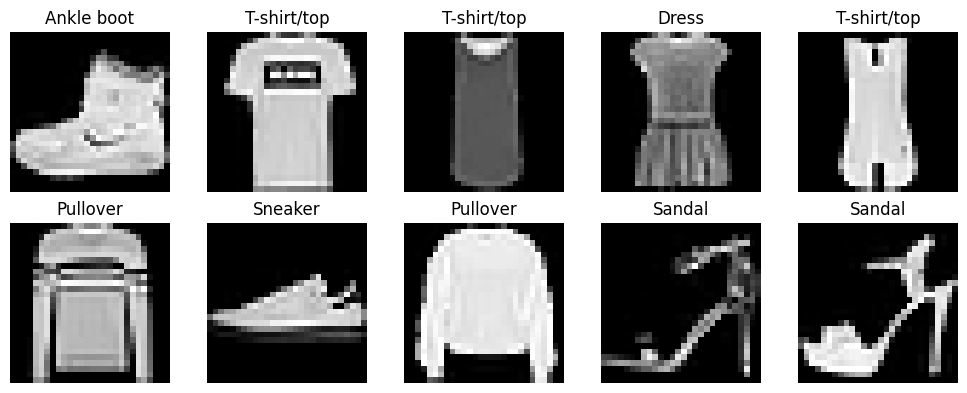

In [3]:
# Veriyi yükle
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizasyon
x_train = x_train / 255.0
x_test = x_test / 255.0

# Girişleri CNN'e uygun hale getirelim (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Sınıf isimleri
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# İlk görselleri gösterelim
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/Users/mehmettirpan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_split=0.1, batch_size=64)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7436 - loss: 0.7300 - val_accuracy: 0.8670 - val_loss: 0.3708
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8778 - loss: 0.3454 - val_accuracy: 0.8790 - val_loss: 0.3367
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8890 - loss: 0.3026 - val_accuracy: 0.8965 - val_loss: 0.2853
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9029 - loss: 0.2681 - val_accuracy: 0.8867 - val_loss: 0.2976
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9090 - loss: 0.2454 - val_accuracy: 0.9053 - val_loss: 0.2553
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9198 - loss: 0.2195 - val_accuracy: 0.9030 - val_loss: 0.2601
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9267 - loss: 0.1981 - val_accuracy: 0.9055 - val_loss: 0.2593
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9325 - loss: 0.1849 - val_a

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9099 - loss: 0.2836
Test accuracy: 0.9105


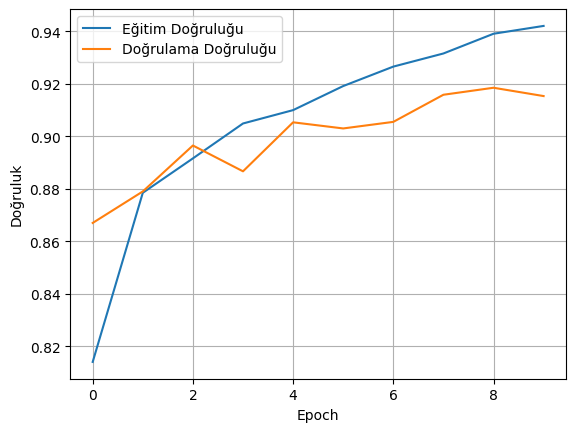

In [6]:
# Test verisiyle doğruluk
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Eğitim grafikleri
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)
plt.show()


# More Deep CNN arch

In [7]:
deep_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

deep_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,962 (1.26 MB)

 Trainable params: 329,962 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history_deep = deep_model.fit(x_train, y_train, epochs=10, 
                              validation_split=0.1, batch_size=64)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.6709 - loss: 0.8818 - val_accuracy: 0.8592 - val_loss: 0.3697
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8531 - loss: 0.4035 - val_accuracy: 0.8823 - val_loss: 0.3037
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8789 - loss: 0.3326 - val_accuracy: 0.8992 - val_loss: 0.2719
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.8902 - loss: 0.2989 - val_accuracy: 0.9090 - val_loss: 0.2423
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8988 - loss: 0.2806 - val_accuracy: 0.9112 - val_loss: 0.2367
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9045 - loss: 0.2607 - val_accuracy: 0.9078 - val_loss: 0.2459
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.9086 - loss: 0.2484 - val_accuracy: 0.9180 - val_loss: 0.2188
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9151 - loss: 0.2354 - 

# Transfer Learning

In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Görüntüleri yeniden boyutlandır (28x28 → 96x96) ve 3 kanallı yap
x_train_rgb = tf.image.grayscale_to_rgb(tf.image.resize(x_train, [96,96]))
x_test_rgb = tf.image.grayscale_to_rgb(tf.image.resize(x_test, [96,96]))

base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze weights

model_transfer = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_transfer.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

model_transfer.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
history_transfer = model_transfer.fit(x_train_rgb, y_train, epochs=10, 
                                      validation_split=0.1, batch_size=64)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 94s 110ms/step - accuracy: 0.8253 - loss: 0.4950 - val_accuracy: 0.8802 - val_loss: 0.3211
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 109ms/step - accuracy: 0.8977 - loss: 0.2753 - val_accuracy: 0.8935 - val_loss: 0.2920
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 91s 108ms/step - accuracy: 0.9088 - loss: 0.2420 - val_accuracy: 0.8982 - val_loss: 0.2780
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 90s 107ms/step - accuracy: 0.9181 - loss: 0.2182 - val_accuracy: 0.8983 - val_loss: 0.2719
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 90s 107ms/step - accuracy: 0.9243 - loss: 0.1984 - val_accuracy: 0.8970 - val_loss: 0.2757
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 90s 107ms/step - accuracy: 0.9335 - loss: 0.1773 - val_accuracy: 0.8978 - val_loss: 0.2803
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 108ms/step - accuracy: 0.9380 - loss: 0.1623 - val_accuracy: 0.8873 - val_loss: 0.3239
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 91s 107ms/step - accuracy: 0.9444 - loss: 0

In [11]:
import time
from tensorflow.keras.utils import plot_model
import pandas as pd

# Temel model değerlendirme
start_time = time.time()
test_loss_base, test_acc_base = model.evaluate(x_test, y_test, verbose=0)
time_base = time.time() - start_time
params_base = model.count_params()

# Derin model değerlendirme
start_time = time.time()
test_loss_deep, test_acc_deep = deep_model.evaluate(x_test, y_test, verbose=0)
time_deep = time.time() - start_time
params_deep = deep_model.count_params()

# Transfer learning model değerlendirme
start_time = time.time()
test_loss_transfer, test_acc_transfer = model_transfer.evaluate(x_test_rgb, y_test, verbose=0)
time_transfer = time.time() - start_time
params_transfer = model_transfer.count_params()

# Sonuçları tabloya dök
results_df = pd.DataFrame({
    "Model": ["Basic CNN", "More Deep CNN", "Transfer Learning (MobileNetV2)"],
    "Test Accuracy (%)": [round(test_acc_base*100, 2), round(test_acc_deep*100, 2), round(test_acc_transfer*100, 2)],
    "Evaluation Time (s)": [round(time_base, 2), round(time_deep, 2), round(time_transfer, 2)],
    "Parametre Sayısı": [params_base, params_deep, params_transfer]
})

print("\nModel Comparison Results\n")
print(results_df.to_string(index=False))



Model Comparison Results

                          Model  Test Accuracy (%)  Evaluation Time (s)  Parametre Sayısı
                      Basic CNN              91.05                 1.03            121930
                  More Deep CNN              91.91                 2.00            329962
Transfer Learning (MobileNetV2)              89.69                16.67           2423242
